<a href="https://colab.research.google.com/github/2107shantanu/All-Things-ML-DL-AI/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Let’s start building our multilayer perceptron using tensorflow. We will begin by importing the required libraries.


In [ ]:
pip install tensorflow==1.13.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 92.6 MB 80 kB/s 
     |████████████████████████████████| 3.2 MB 55.4 MB/s 
     |████████████████████████████████| 50 kB 7.9 MB/s 
     |████████████████████████████████| 367 kB 62.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
    Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636
ERROR: pip's dependency resolver does not currently tak

In [ ]:
## Importing required libraries
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
s = tf.InteractiveSession()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

We can check the tensorflow version

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 1.13.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, absl-py, keras-applications, tensorflow-estimator, grpcio, protobuf, termcolor, wheel, tensorboard, six, astor, gast, keras-preprocessing
Required-by: kapre


Let's load the dataset now.

In [ ]:
X_train=np.load("train.npy")
X_test=np.load("test.npy")

In [ ]:
print(X_train.shape)

(58100, 100)


Let us generate one-hot encoded labels now.

In [ ]:
labels=np.array([0,1])
labels=np.tile(labels,(29050,1))	#290502
l21=np.array([1,0])
l21=np.tile(l21,(29050,1))
y_train=np.concatenate((labels,l21))

labels=np.array([0,1])
labels=np.tile(labels,(5612,1))
l21=np.array([1,0])
l21=np.tile(l21,(5612,1))
y_test=np.concatenate((labels,l21))

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(58100, 100)
(58100, 2)
(11224, 100)
(11224, 2)


We can print and visualize the first input data

[ 0.32913918  0.11418276 -0.15001504  0.878152   -0.37261634 -0.21531838
  0.92283683 -0.19840099 -0.2373563   0.04173235 -0.01595267 -0.33668201
 -0.4715161  -0.5316657   0.06738193 -0.07207102 -0.32112831  0.10530914
  0.65420548 -0.56881649 -0.56910012  0.38175422  0.52962599 -0.26943627
  0.54241516  0.14294665 -0.21062504  0.05818742  0.53388699  0.25704691
  0.05763524  0.43780223 -0.26887245 -0.29121298  0.28282855 -0.43569602
  0.31084077 -0.68238276  0.0525105   0.57149969 -0.00543944 -0.3944395
 -0.36925412  0.3412337  -0.77447119  0.25929517 -0.57444581  0.29580644
 -0.31335476  0.10489712  0.03751386 -0.18659647 -0.00898129  0.12894916
 -0.13862857 -0.0121529  -0.02310789  0.93962637  0.26278689  0.03554171
  0.05481437 -0.29841601  0.45563469  0.06707608  0.24233119  0.26085098
 -0.22131874 -0.64556451  0.24776852  0.31678908  0.22094857 -0.32912151
 -0.04868611 -0.48262732 -0.21552873  0.25516087  0.39723517 -0.06775402
  0.22014485  0.34014801 -0.07780114 -0.41967061 -0.

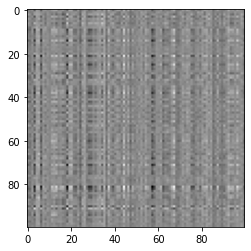

In [ ]:
print(X_test[0])
plt.imshow(X_test[0:100], cmap = plt.cm.binary)
plt.show()

Let’s start our model construction by defining initialization variables.

In [ ]:
num_classes = 2
num_features = X_train.shape[1]
num_output = y_train.shape[1]
num_layers_0 = 512
num_layers_1 = 256
starter_learning_rate = 0.001
regularizer_rate = 0.1

In tensorflow, we define a placeholder for our input variables and output variables and any variables we want to keep track of.

In [ ]:
# Placeholders for the input data
input_X = tf.placeholder('float32',shape =(None,num_features),name="input_X")
input_y = tf.placeholder('float32',shape = (None,num_classes),name='input_Y')
## for dropout layer
keep_prob = tf.placeholder(tf.float32)

As dense layers require weights and biases and they need to be initialized with a random normal distribution with zero mean and small variance (1/square root of the number of features).

In [ ]:
## Weights initialized by random normal function with std_dev = 1/sqrt(number of input features)
weights_0 = tf.Variable(tf.random_normal([num_features,num_layers_0], stddev=(1/tf.sqrt(float(num_features)))))
bias_0 = tf.Variable(tf.random_normal([num_layers_0]))

weights_1 = tf.Variable(tf.random_normal([num_layers_0,num_layers_1], stddev=(1/tf.sqrt(float(num_layers_0)))))
bias_1 = tf.Variable(tf.random_normal([num_layers_1]))

weights_2 = tf.Variable(tf.random_normal([num_layers_1,num_output], stddev=(1/tf.sqrt(float(num_layers_1)))))
bias_2 = tf.Variable(tf.random_normal([num_output]))

Instructions for updating:
Colocations handled automatically by placer.


We will multiply the input for each layer with its respective weights and add bias term. After weights and biases, we need to add an activation; we will use ReLU activation for hidden layers and softmax for the final output layer to get class probability score. Also to prevent overfitting; let ‘s add some drop out after each hidden layer. Dropout is an essential concept in creating redundancies in our network which leads to better generalization.

In [ ]:
## Initializing weigths and biases
hidden_output_0 = tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
hidden_output_0_0 = tf.nn.dropout(hidden_output_0, keep_prob)
hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0_0,weights_1)+bias_1)
hidden_output_1_1 = tf.nn.dropout(hidden_output_1, keep_prob)
predicted_y = tf.sigmoid(tf.matmul(hidden_output_1_1,weights_2) + bias_2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Now we need to define a loss function to optimize our weights and biases, and we will use softmax cross entropy with logits for the predicted and correct label. We will also add some L2 regularization to our network.

Now we need to define an optimizer and learning rate for our network to optimize weights and biases on our given loss function. We will use exponential decay on our learning rate by every five epoch to reduce the learning by 15%. For optimizer, we are going to use Adam optimizer.



In [ ]:
## Defining the loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_y,labels=input_y)) \
        + regularizer_rate*(tf.reduce_sum(tf.square(bias_0)) + tf.reduce_sum(tf.square(bias_1)))

## Variable learning rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)
## Adam optimzer for finding the right weight
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weights_0,weights_1,weights_2,
                                                                         bias_0,bias_1,bias_2])

We are done with our model construction. Let’s define accuracy metric to evaluate our model performance as loss function is non-intuitive.

In [ ]:
## Metrics definition
correct_prediction = tf.equal(tf.argmax(y_train,1), tf.argmax(predicted_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

We will now start training our network on train data and evaluate our network on test dataset simultaneously. We will be using batch optimization with size 128 and train it for 15 epochs.

In [ ]:
## Training parameters
batch_size = 128
epochs=15
dropout_prob = 0.6

training_accuracy = []
training_loss = []
testing_accuracy = []

In [ ]:
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
        s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]],
                          input_y: y_train[arr[index:index+batch_size]],
                        keep_prob:dropout_prob})
    training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train, 
                                                         input_y: y_train,keep_prob:1}))
    training_loss.append(s.run(loss, {input_X: X_train, 
                                      input_y: y_train,keep_prob:1}))
    
    ## Evaluation of model
    testing_accuracy.append(accuracy_score(y_test.argmax(1), 
                            s.run(predicted_y, {input_X: X_test,keep_prob:1}).argmax(1)))
    print("Epoch:{0}, Train loss: {1:.2f} Train acc: {2:.3f}, Test acc:{3:.3f}".format(epoch,
                                                                    training_loss[epoch],
                                                                    training_accuracy[epoch],
                                                                   testing_accuracy[epoch]))

## Plotting chart of training and testing accuracy as a function of iterations
print("Train Accuracy: {0:.2f}".format(training_accuracy[-1]))
print("Test Accuracy:{0:.2f}".format(testing_accuracy[-1]))

Epoch:0, Train loss: 36.91 Train acc: 0.709, Test acc:0.660
Epoch:1, Train loss: 18.19 Train acc: 0.716, Test acc:0.670
Epoch:2, Train loss: 8.91 Train acc: 0.722, Test acc:0.670
Epoch:3, Train loss: 4.37 Train acc: 0.734, Test acc:0.682
Epoch:4, Train loss: 2.22 Train acc: 0.735, Test acc:0.682
Epoch:5, Train loss: 1.23 Train acc: 0.739, Test acc:0.693
Epoch:6, Train loss: 0.81 Train acc: 0.744, Test acc:0.690
Epoch:7, Train loss: 0.64 Train acc: 0.741, Test acc:0.689
Epoch:8, Train loss: 0.57 Train acc: 0.748, Test acc:0.697
Epoch:9, Train loss: 0.55 Train acc: 0.748, Test acc:0.696
Epoch:10, Train loss: 0.55 Train acc: 0.749, Test acc:0.695
Epoch:11, Train loss: 0.55 Train acc: 0.750, Test acc:0.694
Epoch:12, Train loss: 0.55 Train acc: 0.751, Test acc:0.702
Epoch:13, Train loss: 0.54 Train acc: 0.755, Test acc:0.703
Epoch:14, Train loss: 0.54 Train acc: 0.753, Test acc:0.702
Train Accuracy: 0.75
Test Accuracy:0.70


Let’s visualization train and test accuracy as a function of the number of epochs.

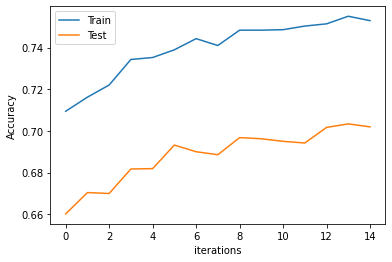

In [ ]:
## Plotting chart of training and testing accuracy as a function of iterations
iterations = list(range(epochs))
plt.plot(iterations, training_accuracy, label='Train')
plt.plot(iterations, testing_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('iterations')
plt.legend()
plt.show()